In [1]:
# Okay, let's get the proper transformations, and also get all the predictions on a subwindow scale - Later as a proof of concept, we will separate the sequences with densities all zero and see how the predicted densities look like.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [3]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0303"

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
len(os.listdir(path_to_dfs)) / 910

7.0

In [6]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [7]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [8]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [9]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [10]:
# ordered_csv_files

In [11]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.52 s, sys: 295 ms, total: 1.82 s
Wall time: 25.1 s


In [12]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [13]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,1.676954e-07,0.060468,3.197090e-07,0.088643,0.0,-0.009465,0.0,-0.008953,0.0,-0.004920,...,0.0,-0.006442,0.000001,-0.016092,0.000004,-0.018346,0.000000,0.028088,0.00000,0.020378
1,2.699901e-05,0.061906,3.494233e-06,0.084169,0.0,0.001359,0.0,-0.005447,0.0,-0.006748,...,0.0,-0.012870,0.000000,-0.024429,0.000000,0.000855,0.000000,0.007673,0.00000,0.000722
2,1.515700e-04,0.062493,3.497421e-06,0.103379,0.0,0.001213,0.0,-0.009857,0.0,-0.007480,...,0.0,0.000662,0.000000,-0.015778,0.000000,-0.005769,0.000000,-0.016291,0.00000,0.007723
3,0.000000e+00,0.043606,0.000000e+00,0.062231,0.0,-0.005858,0.0,-0.005976,0.0,0.002383,...,0.0,0.003521,0.000000,-0.009288,0.000000,0.000949,0.000000,0.009625,0.00000,0.024962
4,0.000000e+00,0.039251,0.000000e+00,0.011734,0.0,-0.009850,0.0,-0.007741,0.0,-0.002558,...,0.0,0.003632,0.000000,-0.002781,0.000000,-0.003577,0.087969,-0.016447,0.02528,0.030964


In [14]:
combined_df.shape

(7, 1820)

In [15]:
# get the true values
True_values_df = combined_df[['True_value']]

In [16]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197090e-07,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000000,0.00000
1,2.699901e-05,3.494233e-06,0.0,0.0,0.0,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
2,1.515700e-04,3.497421e-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000029,0.654502,0.021100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
4,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.087969,0.02528


In [17]:
True_values_df.shape

(7, 910)

In [18]:
# get the proper counts? - Do the transformation
exp_true = np.exp(True_values_df)-1

In [19]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197091e-07,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000001,0.000004,0.000000,0.000000
1,2.699937e-05,3.494239e-06,0.0,0.000000e+00,0.000000,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
2,1.515815e-04,3.497427e-06,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000029,0.924184,0.021324,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.091955,0.025602
5,0.000000e+00,0.000000e+00,0.0,3.197091e-07,0.580778,0.075164,0.000000,0.000000,0.0,0.0,...,0.0,0.0,5.677395e-07,0.000004,2.414957e-12,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.179532,0.476410,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000


In [20]:
# not sure if the aggregation is necessary at this point - but let's do it anyway?
sum_true_values = exp_true.sum(axis = 1)

In [21]:
sum_true_values

0    49.000171
1    46.000007
2    42.999983
3    38.999993
4    36.025885
5    36.000000
6    23.000000
dtype: float64

In [22]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [23]:
# Okay, question here, not sure how the forecasted values were computed, hopefully we figure out what exatctly we need by the end of this script

In [24]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [25]:
len(all_forecasts_npy_files)

910

In [26]:
path_to_dfs

'suggestion_2/forecasted_counts/block_0303'

In [27]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [28]:
# load just the first file
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [29]:
sub_273_forecasts.shape

(1000, 4, 7)

In [30]:
# Okay, so for the subwindow 273 -  this file seem to have all the 1000 values in the 4 chains for all the test time points in the sequence

In [31]:
# transform these values?
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [32]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.97448313, 119.0696)

In [33]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [34]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(0.0, 119.0696)

In [35]:
# cool -  what does these values mean?

In [36]:
# try averaging the forecasted values along the 0th and 1st axis?

In [37]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [38]:
sub_273_forecasts_averged

array([0.5846924 , 0.53754646, 0.540624  , 0.7841915 , 0.8101594 ,
       0.6607042 , 0.7621164 ], dtype=float32)

In [39]:
sub_273_forecasts_averged.shape

(7,)

In [40]:
# sanity check

In [41]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.5846924
0.53754675
0.54062384
0.7841918
0.8101595
0.66070396
0.7621167


In [42]:
# Verify the shape of the true values - these are at a subwindow level, and we can use these as they are for getting the metrics, and the scatterplots?

In [43]:
exp_true.shape

(7, 910)

In [44]:
# Okay, we need the predictions for the subwindows in the same shape? - but before that, we need to do the transformation for all the npy files. We can do this in a loop - we have done this before, use the code as it is.

In [45]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 829 ms, sys: 366 ms, total: 1.2 s
Wall time: 22.7 s


In [46]:
len(catch_all_averaged_preds)

910

In [47]:
catch_all_averaged_preds[0]

array([0.15947168, 0.1510729 , 0.14913164, 0.14944947, 0.15718451,
       0.15387003, 0.1558656 ], dtype=float32)

In [48]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [49]:
Forecasted_values_df.shape

(7, 910)

In [50]:
Forecasted_values_df.head()

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
0,0.159472,0.224669,0.006924,0.002860,0.004619,0.002727,0.062999,0.078539,0.170343,0.001245,...,0.001474,0.019217,0.010084,0.017804,0.011394,0.002903,2.283855e-04,0.002548,0.059923,0.023117
1,0.151073,0.224858,0.009013,0.001568,0.004803,0.001010,0.058154,0.052722,0.191995,0.004252,...,0.001316,0.009669,0.005912,0.004304,0.004656,0.004097,3.848860e-05,0.007525,0.028165,0.010299
2,0.149132,0.242571,0.006961,0.000120,0.001181,0.001125,0.049903,0.058133,0.218184,0.001172,...,0.001224,0.007724,0.000246,0.003649,0.001047,0.004166,8.640289e-07,0.004688,0.016628,0.010976
3,0.149449,0.220683,0.012533,0.004130,0.011004,0.003322,0.054127,0.068145,0.200284,0.017836,...,0.016497,0.015316,0.009673,0.022816,0.019790,0.005640,3.716072e-04,0.010294,0.036944,0.025688
4,0.157185,0.178028,0.002790,0.000814,0.006401,0.002363,0.047686,0.065774,0.196741,0.002619,...,0.008047,0.004149,0.000253,0.006974,0.010324,0.006821,1.288717e-03,0.003756,0.031601,0.036979


In [51]:
# give column names here
Forecasted_values_df.columns = ['forecaster_val_' + str(i) for i in range(910)]

In [52]:
Forecasted_values_df.head()

,forecaster_val_0,forecaster_val_1,forecaster_val_2,forecaster_val_3,forecaster_val_4,forecaster_val_5,forecaster_val_6,forecaster_val_7,forecaster_val_8,forecaster_val_9,...,forecaster_val_900,forecaster_val_901,forecaster_val_902,forecaster_val_903,forecaster_val_904,forecaster_val_905,forecaster_val_906,forecaster_val_907,forecaster_val_908,forecaster_val_909
0,0.159472,0.224669,0.006924,0.002860,0.004619,0.002727,0.062999,0.078539,0.170343,0.001245,...,0.001474,0.019217,0.010084,0.017804,0.011394,0.002903,2.283855e-04,0.002548,0.059923,0.023117
1,0.151073,0.224858,0.009013,0.001568,0.004803,0.001010,0.058154,0.052722,0.191995,0.004252,...,0.001316,0.009669,0.005912,0.004304,0.004656,0.004097,3.848860e-05,0.007525,0.028165,0.010299
2,0.149132,0.242571,0.006961,0.000120,0.001181,0.001125,0.049903,0.058133,0.218184,0.001172,...,0.001224,0.007724,0.000246,0.003649,0.001047,0.004166,8.640289e-07,0.004688,0.016628,0.010976
3,0.149449,0.220683,0.012533,0.004130,0.011004,0.003322,0.054127,0.068145,0.200284,0.017836,...,0.016497,0.015316,0.009673,0.022816,0.019790,0.005640,3.716072e-04,0.010294,0.036944,0.025688
4,0.157185,0.178028,0.002790,0.000814,0.006401,0.002363,0.047686,0.065774,0.196741,0.002619,...,0.008047,0.004149,0.000253,0.006974,0.010324,0.006821,1.288717e-03,0.003756,0.031601,0.036979


In [53]:
exp_true.columns = ['True_val_' + str(i) for i in range(910)]

In [54]:
exp_true.head()

,True_val_0,True_val_1,True_val_2,True_val_3,True_val_4,True_val_5,True_val_6,True_val_7,True_val_8,True_val_9,...,True_val_900,True_val_901,True_val_902,True_val_903,True_val_904,True_val_905,True_val_906,True_val_907,True_val_908,True_val_909
0,1.676954e-07,3.197091e-07,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000000,0.000000
1,2.699937e-05,3.494239e-06,0.0,0.0,0.0,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1.515815e-04,3.497427e-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000029,0.924184,0.021324,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.091955,0.025602


In [55]:
# I think at this point we can go ahead and get the metrics for inference computed?

In [56]:
# exp_true.keys()

In [57]:
# exp_true.values.shape

In [58]:
# use one column for both dataframes? that way it will be easier to compute the metrics?

In [59]:
# Also something to keep in mind here is that the subwindow sizes are very small - 30*30 - this was intentional as we had to do the seq-2-seq model and they are data hungry - therefore having a 300*300 window size was not feasible

In [60]:
exp_true_onecol = pd.DataFrame(exp_true.to_numpy().ravel(), columns=["True_values"])

In [61]:
exp_true_onecol.head()

,True_values
0,1.676954e-07
1,3.197091e-07
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00


In [62]:
exp_true_onecol.shape

(6370, 1)

In [63]:
exp_predicted_onecol = pd.DataFrame(Forecasted_values_df.to_numpy().ravel(), columns=["Forecasted_values"])

In [64]:
exp_predicted_onecol.head()

,Forecasted_values
0,0.159472
1,0.224669
2,0.006924
3,0.002860
4,0.004619


In [65]:
exp_predicted_onecol.shape

(6370, 1)

In [66]:
# compute the metrics - these would look really small as the values we have are really small

In [67]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values']))
rmse

0.17013521136015033

In [68]:
mae = mean_absolute_error(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
mae

0.07737533249052624

In [69]:
corr = pearsonr(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
corr[0]

0.29263579822633257

In [70]:
r2 = r2_score(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
r2

-0.10489954941530888

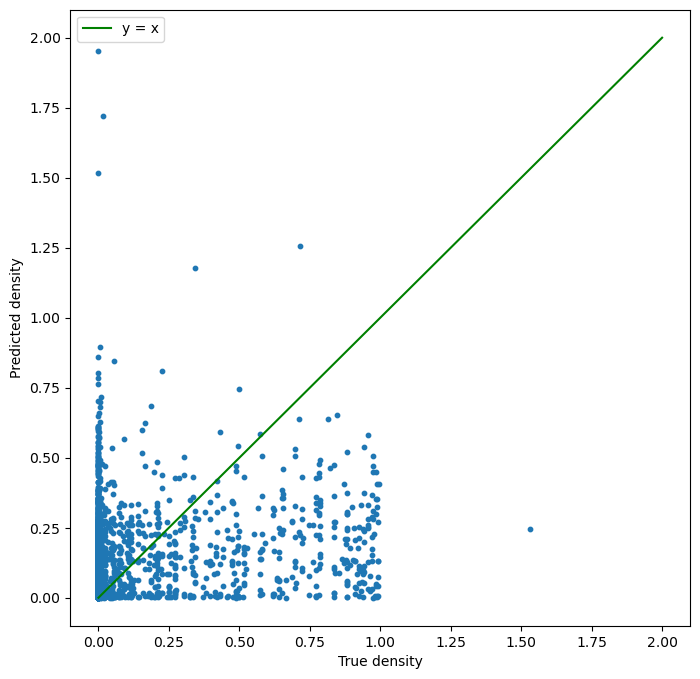

In [160]:
plt.figure(figsize = (8,8))
plt.scatter(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'], s = 10)
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([0, 2], [0, 2], color='green', label='y = x')
plt.legend()
plt.show()

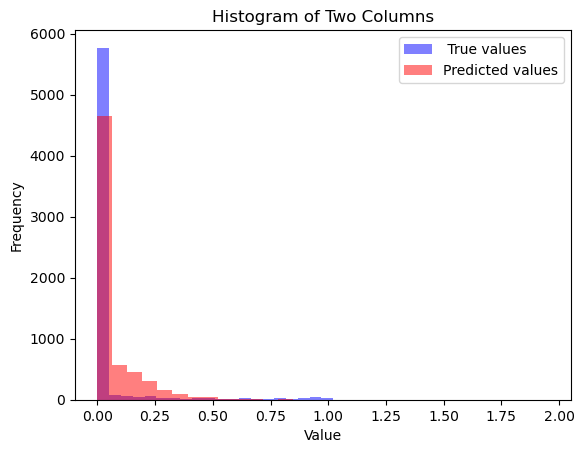

In [72]:
# At this point let's look at the true and predicted value distributions - overlay the histograms

# Plot histogram of two columns
plt.hist(exp_true_onecol['True_values'], 
         bins=30, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(exp_predicted_onecol['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'red') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

In [73]:
# Should we try to get the values separated by 0s?

In [74]:
# how to do this? Maybe we need to take the indices from the true values df, and subset accordingly?

In [75]:
# so create a mask 0 with the true values 0s - we need the indices of this

In [76]:
mask_zero = exp_true_onecol['True_values'].eq(0)

In [77]:
# separate the zero and non-zero indices
idx_zero = exp_true_onecol.index[mask_zero]
idx_nonzero = exp_true_onecol.index[-mask_zero]

In [78]:
# how many zero values?
idx_zero.shape

(4689,)

In [79]:
910*7

6370

In [80]:
# how many non-zeor values
idx_nonzero.shape

(1681,)

In [81]:
# sanity check
idx_nonzero.shape[0] + idx_zero.shape[0]

6370

In [82]:
# Subset both dataframes with the same indices
df_true_zero  = exp_true_onecol.loc[idx_zero]
df_pred_zero  = exp_predicted_onecol.loc[idx_zero]
df_true_nz    = exp_true_onecol.loc[idx_nonzero]
df_pred_nz    = exp_predicted_onecol.loc[idx_nonzero]

In [83]:
df_true_zero.shape, df_pred_zero.shape

((4689, 1), (4689, 1))

In [84]:
df_true_zero.head()

,True_values
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [85]:
df_pred_zero.head()

,Forecasted_values
2,0.006924
3,0.002860
4,0.004619
5,0.002727
6,0.062999


In [86]:
df_true_nz.head()

,True_values
0,1.676954e-07
1,3.197091e-07
21,1.083483e-01
22,8.371883e-01
23,4.608590e-07


In [87]:
df_pred_nz.head()

,Forecasted_values
0,0.159472
1,0.224669
21,0.205208
22,0.216668
23,0.003006


In [88]:
# create the separate scatterplots for these

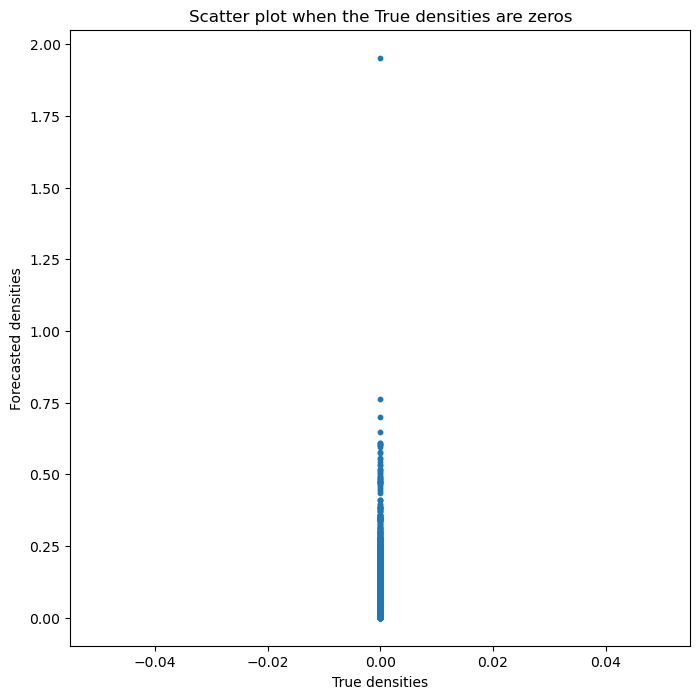

In [89]:
# For zero-data
plt.figure(figsize = (8,8))
plt.scatter(df_true_zero['True_values'], df_pred_zero['Forecasted_values'], s = 10)
plt.title("Scatter plot when the True densities are zeros")
plt.xlabel("True densities")
plt.ylabel("Forecasted densities")
plt.show()

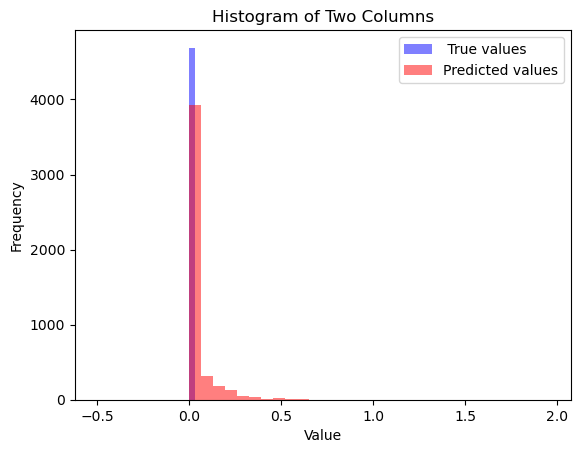

In [90]:
# Plot histogram of two columns
plt.hist(df_true_zero['True_values'], 
         bins=30, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(df_pred_zero['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'red') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

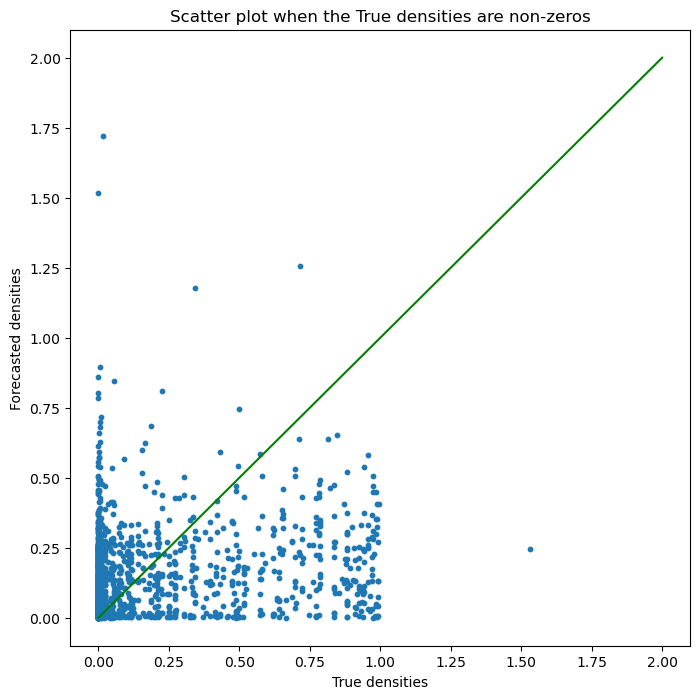

In [161]:
# For non-zero data
plt.figure(figsize = (8,8))
plt.scatter(df_true_nz['True_values'], df_pred_nz['Forecasted_values'], s = 10)
plt.title("Scatter plot when the True densities are non-zeros")
# also plot the y = x line?
plt.plot([0, 2], [0, 2], color='green', label='y = x')
plt.xlabel("True densities")
plt.ylabel("Forecasted densities")
plt.show()

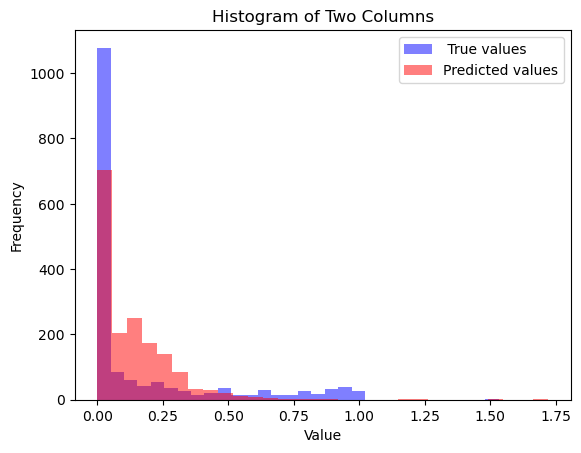

In [92]:
# Plot histogram of two columns
plt.hist(df_true_nz['True_values'], 
         bins=30, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(df_pred_nz['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'red') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

In [93]:
# not that great - but maybe the model is not doing as well as we need due to the number of zeros we had considered during the model training phase?

In [94]:
# Maybe get the metrics for teh reduced subsets of data as well

In [95]:
# All zeros

In [96]:
rmse_zero =  np.sqrt(mean_squared_error(df_true_zero['True_values'], df_pred_zero['Forecasted_values']))
rmse_zero

0.0923489020791884

In [97]:
mae_zero = mean_absolute_error(df_true_zero['True_values'], df_pred_zero['Forecasted_values'])
mae_zero

0.037790299643300766

In [98]:
corr_zero = pearsonr(df_true_zero['True_values'], df_pred_zero['Forecasted_values'])

/mnt/nrdstor/statsgeneral/gayara/tfp_cpu_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [99]:
corr_zero

PearsonRResult(statistic=nan, pvalue=nan)

In [100]:
r2_zero = r2_score(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
r2_zero

-0.07376771685794514

In [101]:
# non zeros

In [102]:
rmse_nzero =  np.sqrt(mean_squared_error(df_true_nz['True_values'], df_pred_nz['Forecasted_values']))
rmse_nzero

0.2930857655336487

In [103]:
mae_nzero = mean_absolute_error(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
mae_nzero

0.18779426111672506

In [104]:
corr_nzero = pearsonr(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])

In [105]:
corr_nzero

PearsonRResult(statistic=0.2119140204349786, pvalue=1.606874164713945e-18)

In [106]:
r2_nzero = r2_score(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
r2_nzero

-0.07376771685794514

Credible Intervals

In [107]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [108]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 292 ms, sys: 68.7 ms, total: 361 ms
Wall time: 362 ms


In [109]:
len(loaded_npy_files)

910

In [110]:
loaded_npy_files[0].shape

(1000, 7)

In [111]:
# Maybe we should not get rid of the negatives? - As for the percentiles we will else never capture the true values of zeros?

In [112]:
# yeah, let's proceed with these

In [113]:
# how to arrange these though? - might need to think this through a little

In [114]:
exp_true.shape

(7, 910)

In [115]:
# where is the lsit of the forecasted range of values? - loaded_npy_files

In [116]:
len(loaded_npy_files)

910

In [117]:
loaded_npy_files[0].shape

(1000, 7)

In [118]:
# Okay, I think we need to move along the loaded file and also its axis 1 to get the percentile values in order.

In [119]:
# create a for loop for this? - and later maybe even a function so we do not need to repeat everything for each block separately

In [120]:
# I think we also need to catch the percentiles?

In [121]:
# Let's try all these?

In [122]:
trial_0 = loaded_npy_files[0][:,0]

In [123]:
trial_0.shape

(1000,)

In [124]:
trial_li = np.percentile(trial_0, axis = 0, q = (2.5, 97.5))

In [125]:
# trial_0.min(), trial_0.max()

In [126]:
trial_li

array([-0.12887453,  0.40622999])

In [127]:
trial_li[0], trial_li[1]

(-0.12887452580034733, 0.40622998923063275)

In [128]:
lower_and_upper_limits = [] 
for j in range(loaded_npy_files[0].shape[1]):
    values = loaded_npy_files[0][:,j]
    # compute the lower and upper bounds?
    li = np.percentile(values, axis = 0, q = (2.5, 97.5))[0]    
    ui = np.percentile(values, axis = 0, q = (2.5, 97.5))[1]
    lower_and_upper_limits.append((li, ui))

In [129]:
lower_and_upper_limits

[(-0.12887452580034733, 0.40622998923063275),
 (-0.14211504198610783, 0.3866851553320884),
 (-0.12903283536434174, 0.3997144728899002),
 (-0.16817170083522795, 0.4060460425913333),
 (-0.195920292660594, 0.41484870463609663),
 (-0.16718288101255893, 0.4015420608222484),
 (-0.15546469949185848, 0.40637690573930735)]

In [130]:
%%time
# Do this for all files?
catch_all_percentiles = []
for i in range(len(loaded_npy_files)):
    all_lower_and_upper_limits = [] 
    for j in range(loaded_npy_files[i].shape[1]):
        values = loaded_npy_files[i][:,j]
        # compute the lower and upper bounds?
        li = np.percentile(values, axis = 0, q = (2.5, 97.5))[0]    
        ui = np.percentile(values, axis = 0, q = (2.5, 97.5))[1]
        all_lower_and_upper_limits.append((li, ui))
    catch_all_percentiles.append(all_lower_and_upper_limits)
    

CPU times: user 863 ms, sys: 3.53 ms, total: 867 ms
Wall time: 869 ms


In [131]:
len(catch_all_percentiles)

910

In [132]:
catch_inside_length = []
for limit_values in catch_all_percentiles:
    length = len(limit_values)
    catch_inside_length.append(length)

In [133]:
np.mean(catch_inside_length)

7.0

In [134]:
# We may need a multitude of sanity checks to make sure we are correctly computing the coverages and widths. Now at this point, we can go ahead and compute the CI widths using the credible intervals? As this computation seems fairly simple?

In [135]:
len(catch_all_percentiles[0])

7

In [136]:
all_percentiles_for_widths = [item for limit_values in catch_all_percentiles for item in limit_values]

In [137]:
len(all_percentiles_for_widths)

6370

In [138]:
# do some sanity check?

In [139]:
catch_all_percentiles[1]

[(-0.17102872543036937, 0.5834140926599503),
 (-0.17822414375841616, 0.62937753200531),
 (-0.16194096878170966, 0.6593963950872421),
 (-0.18846489638090133, 0.6117841705679893),
 (-0.23090496324002743, 0.49781240671873067),
 (-0.17952144779264928, 0.6216732591390608),
 (-0.166270512342453, 0.6099203154444695)]

In [140]:
all_percentiles_for_widths[7:14]

[(-0.17102872543036937, 0.5834140926599503),
 (-0.17822414375841616, 0.62937753200531),
 (-0.16194096878170966, 0.6593963950872421),
 (-0.18846489638090133, 0.6117841705679893),
 (-0.23090496324002743, 0.49781240671873067),
 (-0.17952144779264928, 0.6216732591390608),
 (-0.166270512342453, 0.6099203154444695)]

In [141]:
# seems this is right, let's move forward with the computation of the CI widths?

In [142]:
catch_wdths = []
for values in all_percentiles_for_widths:
    width = values[1] - values[0]
    catch_wdths.append(width)

In [143]:
# average CI width
Average_CI_width = np.mean(catch_wdths)
Average_CI_width

0.20056005366222585

In [144]:
# do a few sanity checks  before we proceed?

In [145]:
catch_wdths[0:7]

[0.5351045150309801,
 0.5288001973181963,
 0.528747308254242,
 0.5742177434265613,
 0.6107689972966907,
 0.5687249418348074,
 0.5618416052311659]

In [146]:
print(catch_all_percentiles[0][0][1] - catch_all_percentiles[0][0][0])
print(catch_all_percentiles[0][1][1] - catch_all_percentiles[0][1][0])
print(catch_all_percentiles[0][2][1] - catch_all_percentiles[0][2][0])
print(catch_all_percentiles[0][3][1] - catch_all_percentiles[0][3][0])
print(catch_all_percentiles[0][4][1] - catch_all_percentiles[0][4][0])
print(catch_all_percentiles[0][5][1] - catch_all_percentiles[0][5][0])
print(catch_all_percentiles[0][6][1] - catch_all_percentiles[0][6][0])

0.5351045150309801
0.5288001973181963
0.528747308254242
0.5742177434265613
0.6107689972966907
0.5687249418348074
0.5618416052311659


In [147]:
# Okay, we can move on now

In [148]:
# What about the coverage?
# Now this list - all_percentiles_for_widths - this is in the oder of the subwindows - but before proceeding to the next subwindow, it also tracks across the 7 time periods.
# so now, we have the true values in a dataframe in the shape (7,910), we can stack these ina single column  - and basically then have to track if this value is inbetween the two upper and lower limits in the list all_percentiles_for_widths.

In [149]:
# cool, so let's get this true values dataset arranged  in one single column?

In [150]:
# actually, we have already done that

In [151]:
exp_true_onecol.shape

(6370, 1)

In [152]:
exp_true_onecol.head()

,True_values
0,1.676954e-07
1,3.197091e-07
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00


In [153]:
All_exp_true_vals_array = exp_true_onecol.values.reshape(-1)

In [154]:
All_exp_true_vals_array.shape

(6370,)

In [155]:
All_exp_true_vals_array.min(), All_exp_true_vals_array.max()

(0.0, 1.5323516475761707)

In [156]:
# cool, now check if this value is inbetween the upper and the lower limits contained in the list - all_percentiles_for_widths

In [157]:
Catch_all_indicators = []
for i in range(All_exp_true_vals_array.shape[0]):
    true_value = All_exp_true_vals_array[i]
    li_val = all_percentiles_for_widths[i][0]
    ui_val = all_percentiles_for_widths[i][1]
    ind_train = (true_value >= li_val) & (true_value <= ui_val)
    Catch_all_indicators.append(ind_train)

In [158]:
coverage_val = np.mean(Catch_all_indicators)
coverage_val

0.6673469387755102

In [159]:
# I think we are ready to replicate this for the rest of the blocks? Let's push the recent work to GitHub